# Laboration - Covid-19

In [141]:
# importing all the relevant packages to complete my project
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

In [142]:
# importing excel file from my data file from data downloaded from government website about covid 19
df_covid_week_sweden = pd.read_excel("../Lab_Covid/Data/Folkhalsomyndigheten_Covid19.xlsx", "Veckodata Riket")
df_covid_week_sweden.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [143]:
# viewing information about the data. There are no NaNs and all data is either an int or a float.
df_covid_week_sweden.info(), df_covid_week_sweden.describe(), df_covid_week_sweden.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

(None,
                 år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
 count   142.000000   142.000000        142.000000                  142.000000   
 mean   2020.957746    26.035211      18378.345070                  177.197183   
 std       0.797809    14.228835      38569.455753                  371.689114   
 min    2020.000000     1.000000          0.000000                    0.000000   
 25%    2020.000000    14.000000       3075.000000                   30.000000   
 50%    2021.000000    26.000000       5531.000000                   53.000000   
 75%    2022.000000    37.750000      21125.000000                  203.500000   
 max    2022.000000    53.000000     265043.000000                 2554.000000   
 
        Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
 count                    142.000000    1.420000e+02          142.000000   
 mean                     354.169014    1.125288e+06        10843.281690   
 std                     

In [144]:
# showing info about the columns. These are the names provided
df_covid_week_sweden.columns, df_covid_week_sweden.index

(Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
        'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
        'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
        'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
        'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
       dtype='object'),
 RangeIndex(start=0, stop=142, step=1))

In [145]:

df_covid_week_sweden.insert(0, "Vecka", df_covid_week_sweden["år"].astype(str) + "v" + df_covid_week_sweden["veckonummer"].astype(str))
df_covid_week_sweden.pop("år")
df_covid_week_sweden.pop("veckonummer")



0       6
1       7
2       8
3       9
4      10
       ..
137    38
138    39
139    40
140    41
141    42
Name: veckonummer, Length: 142, dtype: int64

In [146]:
df_covid_week_sweden

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022v38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022v39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022v40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022v41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


[Text(0.5, 1.0, 'Antal avlinda covid per vecka')]

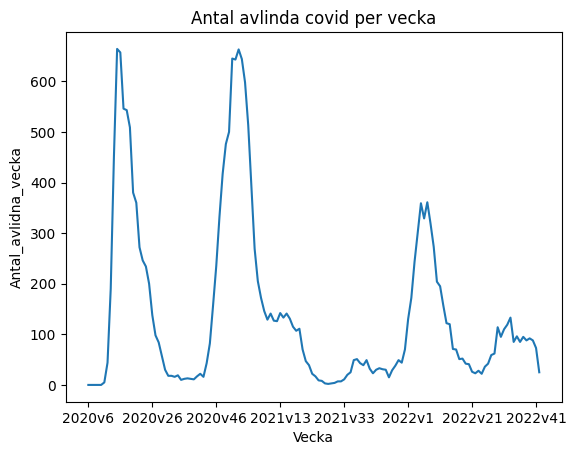

In [163]:
ax = plt.axes()

sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.set(title= "Antal avlinda covid per vecka")


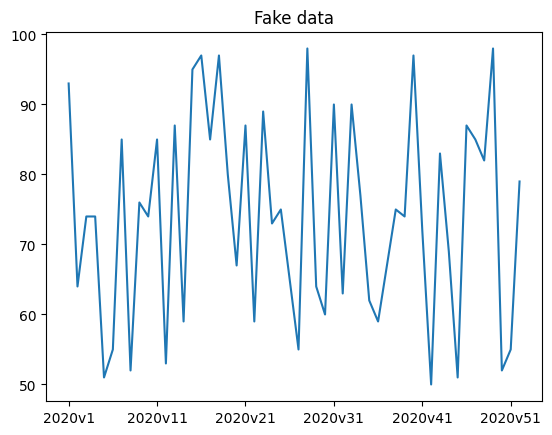

In [155]:
ax = plt.axes()

weeks = [f"2020v{i}" for i in range(1,53)]
values = np.random.randint(50,100, 52)

sns.lineplot(x = weeks, y = values, ax = ax)
ax.set(title = "Fake data")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))